# Análisis de normalidad de los datos y Outliers

Comenzamos por evaluar si hay outliers en nuestra variable target, que en este caso es `price`.

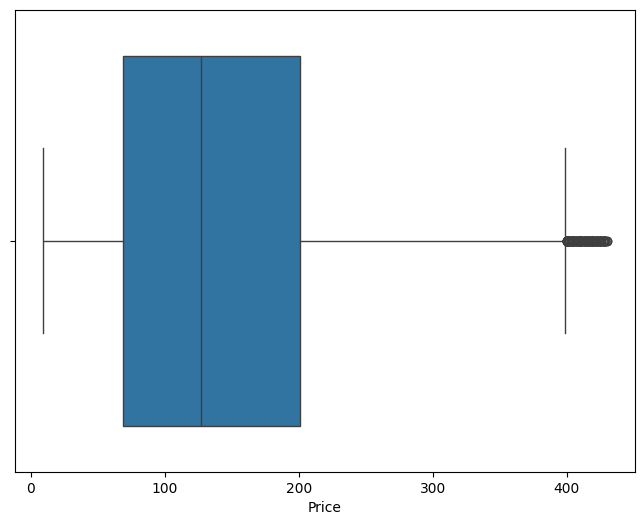

In [358]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['price'])
plt.xlabel('Price')
plt.show()

Como podemos observar tenemos una cantidad muy grande de outliers y nuestro modelo no puede quedar sin eliminar estos datos.

In [359]:
Q1 = df['price'].quantile(0.25) #Acotamos el límite inferior (o sea el caurtil de 25%)
Q3 = df['price'].quantile(0.75) #Acotamos el límite superior (o sea el cuartil de 75%)
IQR = Q3 - Q1 #sacamos la diferencia del tercer y primer cuartil

lower_bound = Q1 - 1.5 * IQR #sacamos el límite inferior
upper_bound = Q3 + 1.5 * IQR #sacamos el límite superior

df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)].copy() #dejamos nuestros datos sin outliers

Continuamos con nuestro análisis de normalidad con ayuda de Gemini para poder escalar nuestros datos y poder obtener mejores modelos de regresión.

Shapiro-Wilk Test: Statistic=0.938, p-value=0.000


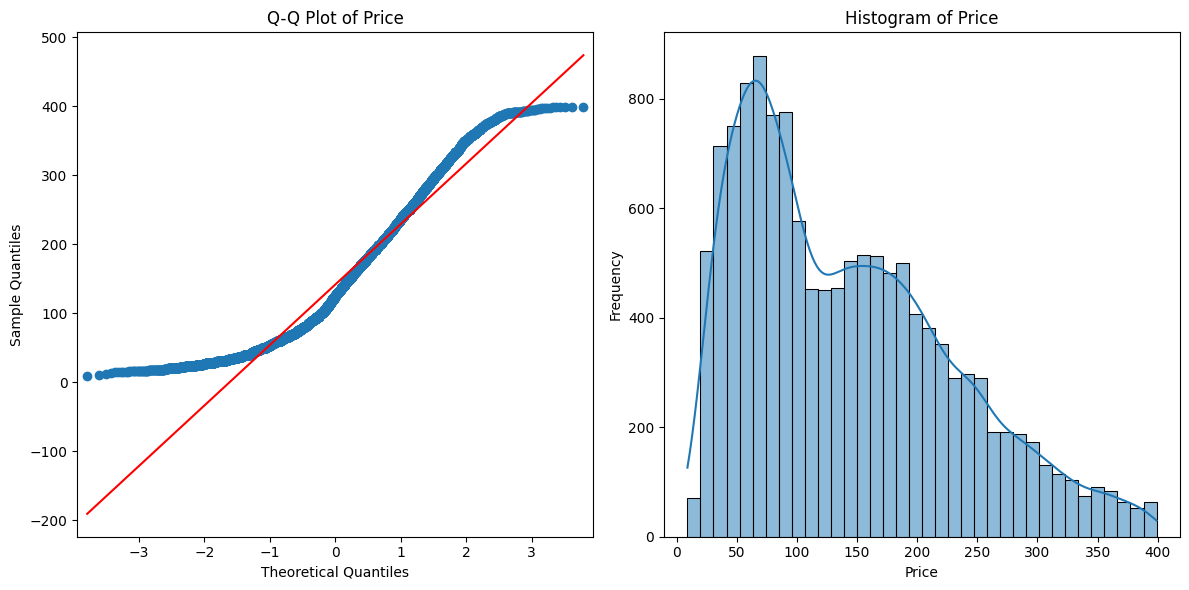

In [360]:
from scipy import stats
import statsmodels.api as sm

# Shapiro-Wilk Test for Normality
shapiro_test = stats.shapiro(df['price'])
print(f"Shapiro-Wilk Test: Statistic={shapiro_test.statistic:.3f}, p-value={shapiro_test.pvalue:.3f}")

# Q-Q Plot
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sm.qqplot(df['price'], line='s', ax=plt.gca())
plt.title('Q-Q Plot of Price')

# Histogram
plt.subplot(1, 2, 2)
sns.histplot(df['price'], kde=True)
plt.title('Histogram of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Proceso de Regresión Lineal Múltiple

Este notebook implementa un modelo de regresión lineal múltiple para predecir el valor mediano de viviendas (`MEDV`) en Boston, utilizando el dataset de precios de viviendas de Boston.

### 1. Importación de Librerías

Se importaron las librerías necesarias para la manipulación de datos, modelado y visualización:
- `pandas` para DataFrames.
- `sklearn.linear_model` para el modelo de regresión lineal.
- `sklearn.model_selection` para dividir los datos en conjuntos de entrenamiento y prueba.
- `sklearn.metrics` para evaluar el modelo (ej. R-cuadrado).
- `matplotlib.pyplot` y `seaborn` para visualizaciones.
- `numpy` para operaciones numéricas.
- `statsmodels.api` para un análisis estadístico más detallado del modelo.

In [361]:
# Librerías importadas:
from sklearn import linear_model
from sklearn import datasets
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings("ignore")

In [362]:
#Utilizaremos una base de datos llamada Boston

df = pd.read_csv('datos_limpios1.csv')

In [363]:
df = df.drop(columns = 'property_type_clean')

In [364]:
price_column_copy = df['price'].copy()
display(price_column_copy.head())

0    210.0
1    285.0
2    170.0
3    110.0
4    333.0
Name: price, dtype: float64

## Intento 1

In [365]:
X = df.drop('price', axis=1) # Eliminando la columna 'Unnamed: 0'
y = price_column_copy

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7,
                                                                test_size = 0.3, random_state = 42)

¿Qué variables ven con una correlación fuerte? Puede ser positiva o negativa

In [366]:
lm =linear_model.LinearRegression()
model = lm.fit(X_train,y_train)

In [367]:
y_train_pred = lm.predict(X_train)
print(y_train_pred[0:5])

[190.90368965 112.42491099 101.79209071 191.10933336 197.47923543]


nuestra $R^2$

In [368]:
lm.score(X_train,y_train)

0.7265417915663033

Lo que podemos ver es que las 13 columnas expresan en un **72%** el comportamiento de mi variable dependiente (price)

5. Ahora obtengamos los coeficientes de las variables ($\beta_1, \beta_2, \beta_3,..., \beta_n$). Esto es con ```.coef_```

In [369]:
lm.coef_

array([-9.02810491e+00, -3.12327409e-01,  1.46533482e-01,  1.17525558e+01,
        2.08003440e+01, -1.70399641e+01, -2.53029697e+02,  2.60723585e+01,
        1.17081171e+01,  5.00190209e+00, -1.73224601e+00, -1.03611845e+00,
       -1.36345353e+00,  4.55336990e-03,  8.05642063e-01, -1.29135134e-02,
       -3.45600665e-02,  2.89377904e-02, -4.44931407e-01,  3.09771903e-03,
        6.83398356e+00,  5.49715602e-01,  9.10411553e+00, -1.83099943e-01,
       -5.00857484e+00,  2.45370661e+00, -1.55987707e+00,  1.03861585e+01,
        2.49475471e-02, -1.02880479e+00,  2.12859479e-01,  5.20535150e+00,
       -9.83317282e-02,  1.57452211e+02,  1.71970348e+01, -2.55388919e+01,
       -8.57023275e+01,  1.05022965e+01,  6.68717834e+00,  7.86499533e+00,
        6.61769528e+00,  7.22890110e+00,  1.31124307e+01,  1.88588806e+01,
       -5.44108827e+00,  2.14158907e+01])

6. Ahora toca obtener nuestra interseccion ($\beta_0$). Lo lograremos con ```intercept_```

In [370]:
lm.intercept_

np.float64(10457.954365130736)

Y así se verá nuestra ecuación:

In [371]:
print('MEDV = ' + 'c = ' + str(lm.intercept_)+ str(lm.coef_) )

MEDV = c = 10457.954365130736[-9.02810491e+00 -3.12327409e-01  1.46533482e-01  1.17525558e+01
  2.08003440e+01 -1.70399641e+01 -2.53029697e+02  2.60723585e+01
  1.17081171e+01  5.00190209e+00 -1.73224601e+00 -1.03611845e+00
 -1.36345353e+00  4.55336990e-03  8.05642063e-01 -1.29135134e-02
 -3.45600665e-02  2.89377904e-02 -4.44931407e-01  3.09771903e-03
  6.83398356e+00  5.49715602e-01  9.10411553e+00 -1.83099943e-01
 -5.00857484e+00  2.45370661e+00 -1.55987707e+00  1.03861585e+01
  2.49475471e-02 -1.02880479e+00  2.12859479e-01  5.20535150e+00
 -9.83317282e-02  1.57452211e+02  1.71970348e+01 -2.55388919e+01
 -8.57023275e+01  1.05022965e+01  6.68717834e+00  7.86499533e+00
  6.61769528e+00  7.22890110e+00  1.31124307e+01  1.88588806e+01
 -5.44108827e+00  2.14158907e+01]


Y hagamos la matriz de correlación
la única diferencia que verán es que ahora le pido con ```round```que los valores de la correlación tengan dos decimales.

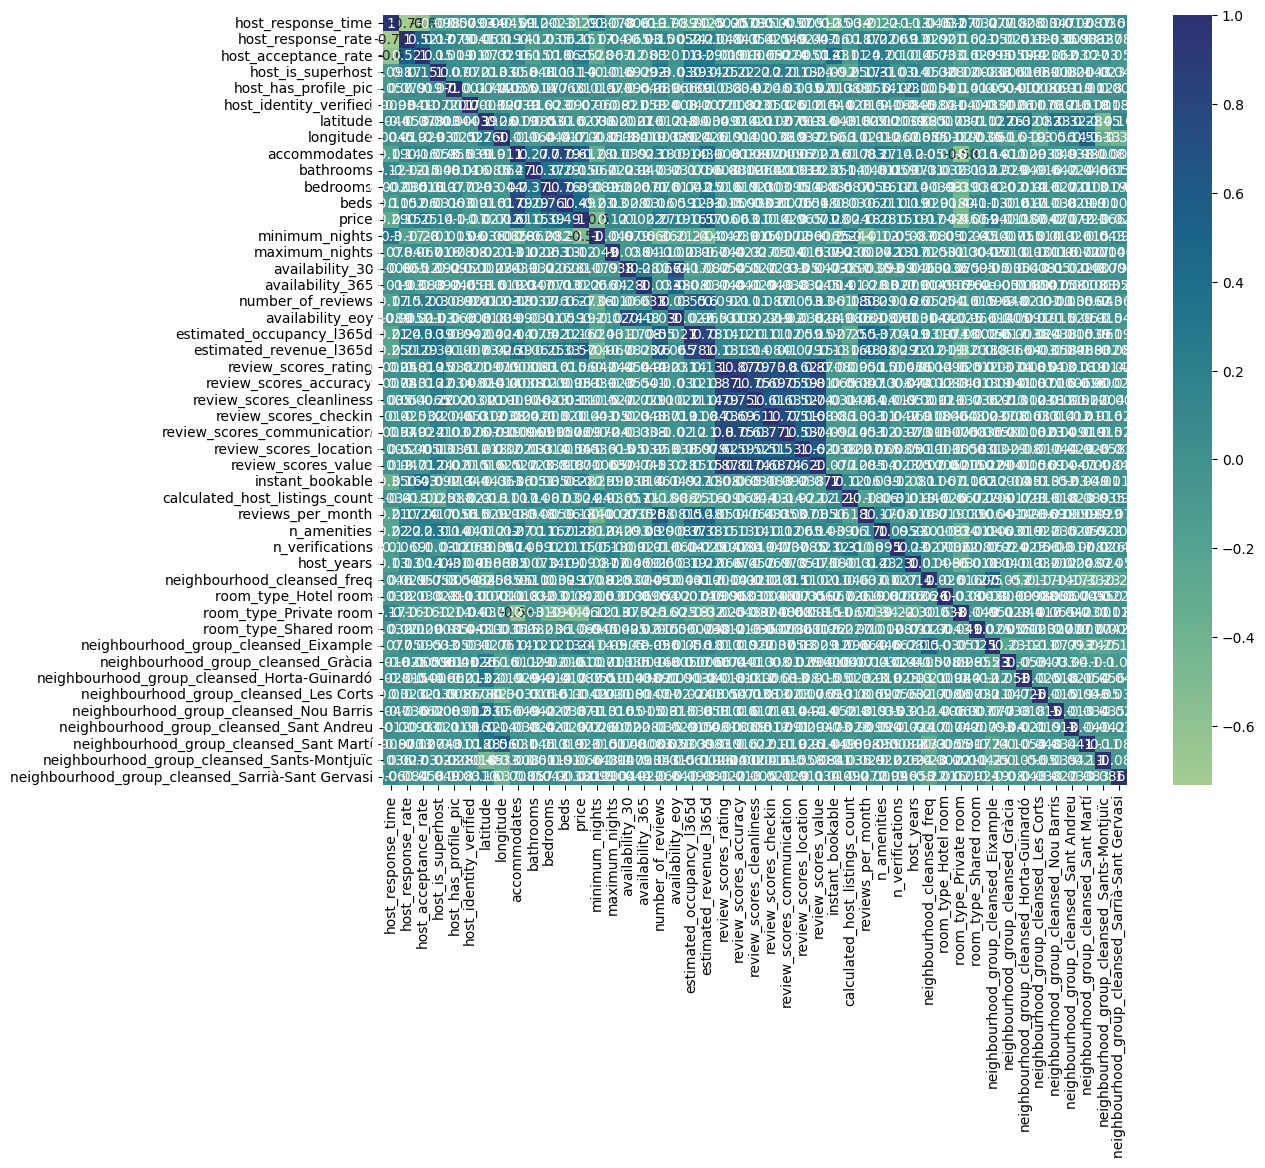

In [372]:
numericc_df = df.select_dtypes(include=np.number)


corrr = numericc_df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corrr, cmap='crest', annot=True)
plt.show()


##Intento 2
Ahora vamos a hacer un modelo con las 10 variables que mas se correlacionan con el precio, para ver si mejora nuestro $R^2$. Como no podemos hacer un mapa de calor porque tenemos demasiadas variables solo sacaremos una lista de las valores de correlación con price.

In [373]:

price_correlations = corrr['price'].sort_values(ascending=False)

# Display the correlations
print("Correlations with 'price' column:")
print(price_correlations)

Correlations with 'price' column:
price                                               1.000000
accommodates                                        0.612891
estimated_revenue_l365d                             0.566403
beds                                                0.485425
bedrooms                                            0.393357
instant_bookable                                    0.277653
n_amenities                                         0.275021
number_of_reviews                                   0.272141
host_acceptance_rate                                0.249381
neighbourhood_group_cleansed_Eixample               0.242652
availability_eoy                                    0.191135
host_years                                          0.188220
reviews_per_month                                   0.184409
neighbourhood_cleansed_freq                         0.172929
estimated_occupancy_l365d                           0.157143
host_response_rate                                 

In [374]:
# Escogemos las 10 varables con mayor correlacion con precio
top10 = [
    'accommodates',
    'estimated_revenue_l365d',
    'beds',
    'bedrooms',
    'instant_bookable',
    'n_amenities',
    'number_of_reviews',
    'host_acceptance_rate',
    'neighbourhood_group_cleansed_Eixample',
    'availability_eoy'
]

print("Top 10 features by absolute correlation with 'price':")
display(bests)

Top 10 features by absolute correlation with 'price':


['accommodates',
 'estimated_revenue_l365d',
 'beds',
 'bedrooms',
 'instant_bookable',
 'n_amenities',
 'number_of_reviews',
 'host_acceptance_rate',
 'neighbourhood_group_cleansed_Eixample',
 'availability_eoy']

In [375]:
#Ahora sí las definimos como variables para nuestro modelo
X2 = df[top10]
y2 = df['price']

In [376]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, train_size = 0.7,
                                                                test_size = 0.3, random_state = 42)

In [377]:
#Volvemos a entrenarlo
lm2 =linear_model.LinearRegression()
model2 = lm2.fit(X_train2,y_train2)

In [378]:
#Realizamos más predicciones
y_train_pred2 = lm2.predict(X_train2)

#print()
print(y_train_pred2[0:5])

[167.58879669 128.84293732 113.68535211 147.39538478 178.47212409]


In [379]:
#Ahora sí veamos que tan bueno es este modelo calculando su R^2
lm2.score(X_train2,y_train2)

0.5581665237570764

##Intento 3

Ahora lo hacemos con las 5 variables que mas se relacionan

In [380]:
top5 = [
    'accommodates',
    'estimated_revenue_l365d',
    'beds',
    'bedrooms',
    'instant_bookable'
]

In [381]:
X3 = df[top5]
y3 = df['price']

In [382]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, train_size = 0.7,
                                                                test_size = 0.3, random_state = 42)

In [383]:
#Volvemos a entrenarlo
lm3 =linear_model.LinearRegression()
model3 = lm3.fit(X_train3,y_train3)

In [384]:

y_train_pred3 = lm3.predict(X_train3)


print(y_train_pred3[0:5])

[157.64944599 159.64522784 104.25979773 149.86577375 187.86637114]


In [385]:
lm3.score(X_train3,y_train3)

0.5311294811038139

Vemos como va bajando nuestra $R^2$ lo que significa que el mejor modelo que hemos encontrado es el que toma en cuenta todas las variables que definen un Airbnb.

# Análisis numéricos y gráficos de los residuales

##Primera ecuación

Realicemos un análisis de nuestro primer modelo de nuestra primera ecuación.

In [386]:
residuales = y_train - y_train_pred

In [387]:
resi = pd.DataFrame(X_train)
resi['residuales'] = residuales
resi.head()

host_response_time  host_response_rate  host_acceptance_rate  \
7779                  0.0                99.0                 100.0   
12561                 2.0                60.0                  36.0   
13030                 0.0                99.0                  98.0   
6174                  0.0                99.0                  79.0   
5195                  0.0                97.0                  99.0   

       host_is_superhost  host_has_profile_pic  host_identity_verified  \
7779                 0.0                   1.0                     1.0   
12561                0.0                   0.0                     1.0   
13030                0.0                   1.0                     1.0   
6174                 0.0                   1.0                     0.0   
5195                 0.0                   1.0                     1.0   

        latitude  longitude  accommodates  bathrooms  ...  \
7779   41.397709   2.167878           2.0        1.0  ...   
12561  41.398680   2.206110           6.0        2.0  ...   
13030  41.422490   2.199360           2.0        1.0  ...   
6174   41.406690   2.154520           5.0        1.0  ...   
5195   41.391081   2.169507           6.0        2.0  ...   

       neighbourhood_group_cleansed_Eixample  \
7779                                       1   
12561                                      0   
13030                                      0   
6174                                       0   
5195                                       1   

       neighbourhood_group_cleansed_Gràcia  \
7779                                     0   
12561                                    0   
13030                                    0   
6174                                     1   
5195                                     0   

       neighbourhood_group_cleansed_Horta-Guinardó  \
7779                                             0   
12561                                            0   
13030                                            0   
6174                                             0   
5195                                             0   

       neighbourhood_group_cleansed_Les Corts  \
7779                                        0   
12561                                       0   
13030                                       0   
6174                                        0   
5195                                        0   

       neighbourhood_group_cleansed_Nou Barris  \
7779                                         0   
12561                                        0   
13030                                        0   
6174                                         0   
5195                                         0   

       neighbourhood_group_cleansed_Sant Andreu  \
7779                                          0   
12561                                         0   
13030                                         0   
6174                                          0   
5195                                          0   

       neighbourhood_group_cleansed_Sant Martí  \
7779                                         0   
12561                                        1   
13030                                        1   
6174                                         0   
5195                                         0   

       neighbourhood_group_cleansed_Sants-Montjuïc  \
7779                                             0   
12561                                            0   
13030                                            0   
6174                                             0   
5195                                             0   

       neighbourhood_group_cleansed_Sarrià-Sant Gervasi  residuales  
7779                                                  0    5.096310  
12561                                                 0   86.575089  
13030                                                 0  -39.792091  
6174                                                  0  -21.109333 

In [388]:
fig = plt.figure()
sns.distplot(residuales, bins = 15)
plt.title('Error', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

Como podemos observar nuestro grádico tenemos un muy buen modelo que se acerca bastante a los valores reales, la linea azul traza los valores predecidos y las barras los valores reales.

##Segunda ecuación

In [389]:
residuales2 = y_train2 - y_train_pred2

In [390]:
resi2 = pd.DataFrame(X_train2)
resi2['residuales2'] = residuales2
resi2.head()

accommodates  estimated_revenue_l365d  beds  bedrooms  \
7779            2.0                  30576.0   1.0       0.0   
12561           6.0                      0.0   5.0       3.0   
13030           2.0                      0.0   1.0       1.0   
6174            5.0                   6120.0   4.0       2.0   
5195            6.0                      0.0   3.0       3.0   

       instant_bookable  n_amenities  number_of_reviews  host_acceptance_rate  \
7779                  1           50                 73                 100.0   
12561                 0           10                  0                  36.0   
13030                 1           13                  0                  98.0   
6174                  0           26                 14                  79.0   
5195                  1           24                  3                  99.0   

       neighbourhood_group_cleansed_Eixample  availability_eoy  residuales2  
7779                                       1                45    28.411203  
12561                                      0                 1    70.157063  
13030                                      0               106   -51.685352  
6174                                       0                71    22.604615  
5195                                       1                 0    27.527876

In [391]:
fig2= plt.figure()
sns.distplot(residuales2, bins = 15)
plt.title('Error', fontsize = 15)
plt.xlabel('y_train2 - y_train_pred2', fontsize = 15)
plt.show()

Como podemos ver, el gráfico se distingue mucho de la primera ecuación y es que nuestra primera ecuación tiene un R2$ mas alta representando una mejor predicción.

##Ecuación 3

In [392]:
residuales3 = y_train3 - y_train_pred3

In [393]:
resi3 = pd.DataFrame(X_train3)
resi3['residuales3'] = residuales3
resi3.head()

accommodates  estimated_revenue_l365d  beds  bedrooms  \
7779            2.0                  30576.0   1.0       0.0   
12561           6.0                      0.0   5.0       3.0   
13030           2.0                      0.0   1.0       1.0   
6174            5.0                   6120.0   4.0       2.0   
5195            6.0                      0.0   3.0       3.0   

       instant_bookable  residuales3  
7779                  1    38.350554  
12561                 0    39.354772  
13030                 1   -42.259798  
6174                  0    20.134226  
5195                  1    18.133629

In [394]:
fig3 = plt.figure()
sns.distplot(residuales3, bins = 15)
plt.title('Error', fontsize = 15)
plt.xlabel('y_train3 - y_train_pred3', fontsize = 15)
plt.show()

Finalmente, en este gráfico los valores reales si son más distintos que las predicciones y por lo tanto por eso es un mal modelo comparado con el primer y segundo modelo.

Después de analizar los gráficos y los p-values, concluimos que los datos de los residuales del modelo de regresión lineal inicial no están distribuidos normalmente. Para futuros casos sería un paso clave hacer esta normalización de datos para obtener mejores resultados  

#Modelo de Regresión Logística

Ahora queremos crear un modelo que en base a una variable, donde podamos meter datos de un Airbnb y nos diga si nos recomienda rentar ese Airbnb o no. Para ello tenemos que pasar todas nuestras variables a binario, excepto las variables estrictamente numéricas, como la cantidad de baños, camas y habitaciones. Tomaremos como variable referencia la de review_scores_value, donde un Airbnb será recomendable si su puntuación es >4.5.

In [409]:
df['review_scores_value'].head()

0    4.32
1    4.68
2    4.47
3    4.23
4    4.46
Name: review_scores_value, dtype: float64

Ahora sí tomamos la columna de `review_scores_value` y la guardamos en una nueva variable poniéndola en binario. Así 1 cuando su puntuación es mayor a 4.5 y 0 si es 4.5 o menor.

In [410]:
df['recomendable'] = df['review_scores_value'].apply(lambda x: 1 if x > 4.5 else 0)
display(df[['review_scores_value', 'recomendable']].head())

review_scores_value  recomendable
0                 4.32             0
1                 4.68             1
2                 4.47             0
3                 4.23             0
4                 4.46             0

In [411]:
df['recomendable'].value_counts()

recomendable
1    8722
0    4693
Name: count, dtype: int64

Podemos ver que tenemos una buena distribución de datos, o sea que no salgrá sesgado nuestro modelo.

In [412]:
listings2 = df.drop(['review_scores_value'], axis=1)

In [413]:
#Ahora sí guardamos las variables para hacer el modelo
Xr = listings2.drop(['recomendable'], axis=1)
yr = listings2['recomendable']

In [414]:
X_trainr, X_testr, y_trainr, y_testr = train_test_split(Xr, yr, train_size = 0.8, test_size =0.2 ,
                                                   random_state = 42)

In [416]:
model = LogisticRegression()


In [402]:
# Identify categorical columns (object type) in the DataFrame
categorical_cols = df.select_dtypes(include='object').columns

# Apply one-hot encoding to convert categorical columns to numerical
# drop_first=True helps to avoid multicollinearity
if not categorical_cols.empty:
    df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)
else:
    df_encoded = df.copy()

# Define y from df_encoded BEFORE dropping 'price' for X
y = df_encoded['price'].copy()

# Update X to be the encoded DataFrame. This X will be used in subsequent steps.
# IMPORTANT: Ensure the target variable 'price' is not in X
if 'price' in df_encoded.columns:
    X = df_encoded.drop(columns=['price'])
else:
    X = df_encoded

# Handle NaN values by imputing them with the mean of their respective columns
# This is done before splitting into train/test to ensure consistency
X = X.fillna(X.mean())

print("First 5 rows of X after one-hot encoding, price removal, and NaN imputation:")
display(X.head())
print("First 5 rows of y (price) after encoding:")
display(y.head())
print("Data types of X after encoding, price removal, and imputation:")
display(X.dtypes.value_counts())
print("Number of NaN values in X after imputation:")
display(X.isnull().sum().sum())

First 5 rows of X after one-hot encoding, price removal, and NaN imputation:


host_response_time  host_response_rate  host_acceptance_rate  \
0                 0.0                96.0                  91.0   
1                 0.0               100.0                  96.0   
2                 0.0               100.0                 100.0   
3                 0.0               100.0                  92.0   
4                 0.0               100.0                  92.0   

   host_is_superhost  host_has_profile_pic  host_identity_verified   latitude  \
0                0.0                   1.0                     1.0  41.405560   
1                1.0                   1.0                     1.0  41.412432   
2                0.0                   1.0                     1.0  41.405660   
3                0.0                   1.0                     1.0  41.380620   
4                0.0                   1.0                     1.0  41.379780   

   longitude  accommodates  bathrooms  ...  \
0    2.17262           8.0        2.0  ...   
1    2.21975           5.0        2.0  ...   
2    2.17015           6.0        2.0  ...   
3    2.17517           2.0        1.0  ...   
4    2.17623           9.0        3.0  ...   

   neighbourhood_group_cleansed_Eixample  neighbourhood_group_cleansed_Gràcia  \
0                                      1                                    0   
1                                      0                                    0   
2                                      0                                    1   
3                                      0                                    0   
4                                      0                                    0   

   neighbourhood_group_cleansed_Horta-Guinardó  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   neighbourhood_group_cleansed_Les Corts  \
0                                       0   
1                                       0   
2                                       0   
3                                       0   
4                                       0   

   neighbourhood_group_cleansed_Nou Barris  \
0                                        0   
1                                        0   
2                                        0   
3                                        0   
4                                        0   

   neighbourhood_group_cleansed_Sant Andreu  \
0                                         0   
1                                         0   
2                                         0   
3                                         0   
4                                         0   

   neighbourhood_group_cleansed_Sant Martí  \
0                                        0   
1                                        1   
2                                        0   
3                                        0   
4                                        0   

   neighbourhood_group_cleansed_Sants-Montjuïc  \
0                                            0   
1                                            0   
2                                            0   
3                                            0   
4                                            0   

   neighbourhood_group_cleansed_Sarrià-Sant Gervasi  recomendable  
0                                                 0             0  
1                                                 0             1  
2                                                 0             0  
3                                                 0             0  
4                                                 0             0  

[5 rows x 47 columns]

First 5 rows of y (price) after encoding:


0    210.0
1    285.0
2    170.0
3    110.0
4    333.0
Name: price, dtype: float64

Data types of X after encoding, price removal, and imputation:


int64      24
float64    23
Name: count, dtype: int64

Number of NaN values in X after imputation:


np.int64(0)

In [419]:
#entrenamos el modelo
model.fit(X_trainr, y_trainr)

LogisticRegression()

In [421]:
import numpy
import sys

numpy.set_printoptions(threshold=sys.maxsize)
model.predict_proba(X_trainr)

array([[3.09526905e-01, 6.90473095e-01],
       [4.75321711e-01, 5.24678289e-01],
       [3.47581628e-01, 6.52418372e-01],
       [2.65700491e-01, 7.34299509e-01],
       [2.14827722e-01, 7.85172278e-01],
       [3.94423389e-01, 6.05576611e-01],
       [2.93877803e-01, 7.06122197e-01],
       [4.17825580e-01, 5.82174420e-01],
       [4.90052216e-01, 5.09947784e-01],
       [4.06508572e-01, 5.93491428e-01],
       [2.60304023e-01, 7.39695977e-01],
       [5.13194099e-01, 4.86805901e-01],
       [3.46073327e-01, 6.53926673e-01],
       [2.62784531e-01, 7.37215469e-01],
       [4.29467554e-01, 5.70532446e-01],
       [4.19198846e-01, 5.80801154e-01],
       [4.44232357e-01, 5.55767643e-01],
       [3.64908516e-01, 6.35091484e-01],
       [2.90981019e-01, 7.09018981e-01],
       [1.68038918e-01, 8.31961082e-01],
       [4.24778504e-01, 5.75221496e-01],
       [2.60079448e-01, 7.39920552e-01],
       [5.25076981e-01, 4.74923019e-01],
       [5.25061539e-01, 4.74938461e-01],
       [5.290128

In [423]:
#Veamos el score de nuestro modelo
model.score(X_trainr, y_trainr)

0.668654491241148

Podemos ver que nuestro modelo tiene una gran $R^2$ lo que significa que tenemos un gran modelo, sin embargo aún es necesario observar su accuracy, precision, f1-score y support para asegurarnos de que sea un buen modelo.

In [425]:
#veamos los coeficientes del modelo
model.coef_

array([[ 8.58244554e-04,  1.05651822e-02, -7.67630261e-03,
         8.40717038e-04,  1.79300661e-04,  3.01006363e-04,
         9.41878191e-03,  4.93060538e-04, -3.31310336e-04,
         6.51420637e-04,  4.39988375e-04, -3.44676285e-04,
        -1.89424311e-04,  2.43030705e-02, -6.46263915e-04,
         6.82203335e-04,  5.57385785e-05,  4.00410496e-03,
        -5.58431220e-03, -6.04704581e-03,  2.08418866e-05,
         2.84825661e-03,  2.70932123e-03,  2.63007279e-03,
         2.38245471e-03,  2.48074335e-03,  2.00193025e-03,
        -4.92093295e-04, -1.23382410e-03, -5.21457281e-04,
         8.25071339e-03,  3.49937001e-04,  5.93077039e-04,
         1.69108738e-05, -3.82437948e-06,  4.64624274e-04,
        -6.88989821e-06,  6.51355008e-05,  1.19374601e-05,
         4.62818946e-06,  1.95486029e-05,  2.56150719e-05,
         2.65761553e-05,  4.61474052e-07, -4.42354893e-05,
         5.79308790e-05]])

In [426]:
#predicciones
y_train_predir = model.predict(X_trainr)

Finalmente hacemos nuestro reporte de clasificación para observar que tan buen modelo tenemos:

In [427]:
print(classification_report(y_trainr, y_train_predir))

              precision    recall  f1-score   support

           0       0.57      0.22      0.32      3761
           1       0.68      0.91      0.78      6971

    accuracy                           0.67     10732
   macro avg       0.63      0.57      0.55     10732
weighted avg       0.64      0.67      0.62     10732



¡Súper! Como se observa tenemos un **accuracy** del 60% lo que quiere decir que nuestro modelo puede explicar al menos un 60% de nuestros datos.

Tenemos una **precisión** de 57% cuando un airbnb no es recomendable y un 68% cuando un airbnb es recomendable.

Nuestro **recall** nos indica que nuestro modelo es mayormente sensible con los airbnbs recomendables.

Aunque hay mayor **support** en el lado de los airbnb recomendables tenemos una buena distribución de los datos.



Finalizamos con su matriz de confusión para observar sus veraderos positivos, verdaderos negativos, falsos positivos y falsos negativos.

In [428]:
#matriz de confusión(real, pronostico)
cf = confusion_matrix(y_trainr, y_train_predir)
print(cf)

[[ 840 2921]
 [ 635 6336]]


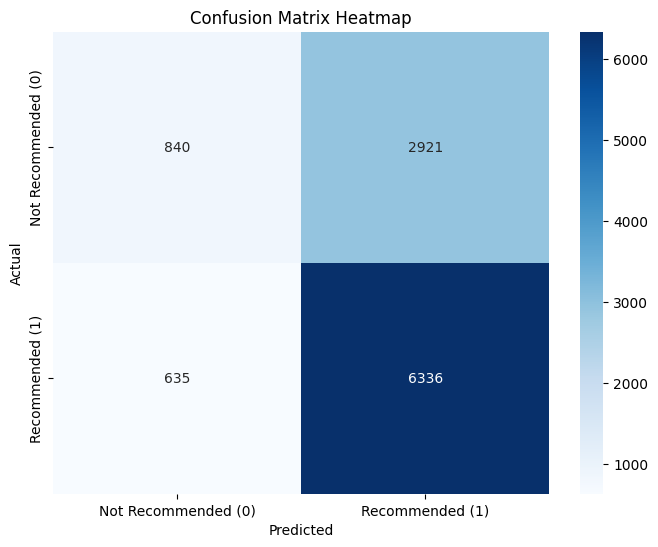

In [429]:
#Visualicemos la matriz de confusión como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(cf, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Recommended (0)', 'Recommended (1)'], yticklabels=['Not Recommended (0)', 'Recommended (1)'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap')
plt.show()

Verdaderos Negativos (VN): 840

Estos son los casos en los que el modelo predijo correctamente un Airbnb como No Recomendado (real 0, predicho 0).
Falsos Positivos (FP): 2921

Estos son los casos en los que el modelo predijo incorrectamente un Airbnb como Recomendado cuando en realidad era No Recomendado (real 0, predicho 1). Esto es un "error de Tipo I". En este contexto, significa que el modelo sugirió que un Airbnb era bueno, pero no lo era.
Falsos Negativos (FN): 635

Estos son los casos en los que el modelo predijo incorrectamente un Airbnb como No Recomendado cuando en realidad era Recomendado (real 1, predicho 0). Esto es un "error de Tipo II". Esto significa que el modelo pasó por alto un Airbnb bueno.
Verdaderos Positivos (VP): 6336

Estos son los casos en los que el modelo predijo correctamente un Airbnb como Recomendado (real 1, predicho 1).

---



Ahora con nuestro modelo podemos realizar una predicción de si nos recomienda un Airbnb o no dependiendo los datos que le metamos.

In [432]:
#Creamos una nueva fila con todos los datos de nuestro Airbnb imaginario
nuevo_airbnb_data_log = {
    'accommodates': [2],
    'host_is_superhost': [0],
    'maximum_nights': [30.0], # Corrected column name to match Xr
    'minimum_nights': [1.0], # Corrected column name to match Xr
    'price': [50.0],  # This 'price' is now a feature for the logistic model
    'beds': [1.0],
    'bedrooms': [1.0],
    'bathrooms': [0.5],
    'instant_bookable': [0],
    'room_type_Private room': [1],
    'room_type_Hotel room': [0],
    'room_type_Shared room': [0]
    # Add other 'room_type_' columns if they were part of Xr training, e.g., 'room_type_Entire home/apt': [0]
    # Note: Amenities like 'amen_co_alarm', 'amen_essentials' etc. were not in the training Xr
    # if they were intended to be features, they must be created during data preprocessing.
    # The provided Xr.columns do not contain these specific amenity columns as direct features.
    # Neighbourhood clusters also need to be handled correctly to match Xr. For simplicity, we'll set most to 0.
}

# Convert user input to a DataFrame
input_df_temp = pd.DataFrame(nuevo_airbnb_data_log)

# Create an empty DataFrame with the exact columns as Xr, filled with zeros
# This ensures that all expected features are present
prediction_df = pd.DataFrame(0, index=[0], columns=Xr.columns)

# Populate the prediction_df with the values from input_df_temp for matching columns
for col in input_df_temp.columns:
    if col in prediction_df.columns:
        prediction_df[col] = input_df_temp[col].values
    else:
        print(f"Warning: Column '{col}' from input data not found in model's training features (Xr.columns).")

# Realizamos la predicción
# Ensure the model variable is 'model' as trained in the Logistic Regression section
prediccion_recomendable = model.predict(prediction_df)

#imprimimos los resultados :)
if prediccion_recomendable[0] == 1:
    print("Based on the model, this Airbnb is recommended.")
else:
    print("Based on the model, this Airbnb is not recommended.")

Based on the model, this Airbnb is not recommended.
